## Aggregating annotations

In [1]:
def check_annotations(d):
    error = []
    for annotations in d:
        for annotation in annotations:
            if not 'speaker' in annotation:
                error.append('speaker')
            if not 'Annotator' in annotation:
                error.append('Annotator')
            if not 'Gold' in annotation:
                error.append('Gold')
    return error

#### From zip files

In [9]:
# import json
# import glob
# import zipfile
# import pandas as pd

# annotation_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-annotations"
# all_annotations = []
# for file in glob.glob(annotation_folder + '/*.zip'):
#     with zipfile.ZipFile(file) as myzip:
#         for filename in myzip.namelist():
#             if filename.endswith('.json'):
#                 f = myzip.open(filename)
#                 try:
#                     d = json.load(f)
#                     error = check_annotations(d)
#                     if  error:
#                         print('Wrong data in', filename)
#                     elif not len(d)==3:
#                         print('Wrong data in', filename, len(d))
#                     else:
#                         all_annotations.extend(d)
#                 except:
#                     print('Error reading', file, filename)

In [2]:
import json
import glob
import zipfile
import pandas as pd

annotation_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-annotations"
all_annotations = []
for filename in glob.glob(annotation_folder + '/*.json'):
    with open(filename) as f:
        d = json.load(f)
        error = check_annotations(d)
        if  error:
            print('Wrong data in', filename)
        elif not len(d)==3:
            print('Wrong data in', filename, len(d))
        else:
            all_annotations.extend(d)

In [3]:
print('Total number of annotations', len(all_annotations))

Total number of annotations 81


In [4]:
anno_dict = {}
for annotations in all_annotations:
    for annotation in annotations:
        try:
            speaker = annotation['speaker']
            annotator = annotation['Annotator']
            emotion = annotation['Gold']
            if speaker == 'Llama' or speaker == 'Human':
                continue
            turn_id = annotation['turn_id']
            key = speaker+str(turn_id)
            if key in anno_dict:
                anno = anno_dict[key]
                if 'Votes' in anno:
                    anno['Votes'].append(emotion)
                    anno['Annotators'].append(annotator)
                else:
                    anno['Votes'] = [emotion]
                    anno['Annotators']= [annotator]
            else:
                annotation['Votes'] = [emotion]
                annotation['Annotators']= [annotator]
                anno_dict[key]=annotation
        except:
            print('Error in annotation', annotations)
            break

In [5]:
merged_annotations = []
for key in anno_dict:
    merged_annotations.append(anno_dict[key])
all_file = "all_annotations.json"
with open(all_file,'w') as file:
    json.dump(merged_annotations, file, indent = 4)

## Data statistics

In [6]:
from collections import Counter, OrderedDict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_labels_with_counts(labels, values):
    total = 0
    for v in values:
        total+=v
    print('Total of values', total)
    ax = sns.barplot(x=labels, y=values)
    #rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
    # Add values above bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, str(int((v/total*100)))+'%', ha='center')
    plt.show()

In [7]:
df = pd.read_json("all_annotations.json")
df.head()

,utterance,speaker,turn_id,Annotator,Gold,Votes,Annotators
0,Hi there! Going going well!,Raul,4,Pawel,neutral,"[neutral, joy, joy]","[Pawel, Leo Mylonadis, Matt]"
1,From hike? Do yo want to convince me you're a ...,Raul,6,Pawel,neutral,"[neutral, neutral, surprise]","[Pawel, Leo Mylonadis, Matt]"
2,I hope that your dried llama food isn't anythi...,Raul,8,Pawel,disgust,"[disgust, disgust, neutral]","[Pawel, Leo Mylonadis, Matt]"
3,Don't wink wink at me!,Raul,10,Pawel,anger,"[anger, anger, anger]","[Pawel, Leo Mylonadis, Matt]"
4,I think all the LLM hype is quite suspicious!,Raul,12,Pawel,anger,"[anger, fear, surprise]","[Pawel, Leo Mylonadis, Matt]"


Speaker values {'Jake', 'Hi Llama.', 'Moon.', 'Coco', 'Amber', 'Igor', 'Hi, my name is Anna.', 'Hello', 'Robert', 'Wilbur', 'Coins', 'Charles', 'Bob', "Hi, I'm Lalamama.", 'Hi Llama, my name is Pretzel.', 'Dorkus', 'Sissy', 'Carol', 'Tom', 'Hajmola', 'Hello! My name is Alice.', 'Raul', 'Bassie', 'Kristof', 'Big Head', 'Boris', 'Olaf', 'bye', 'Sarah', 'Leon', 'Pretzel.', 'Artemidorus', "Hey, I'm Lolamama."}

OrderedDict([('Amber', 20), ('Artemidorus', 12), ('Bassie', 13), ('Big Head', 21), ('Bob', 21), ('Boris', 20), ('Carol', 18), ('Charles', 16), ('Coco', 20), ('Coins', 10), ('Dorkus', 16), ('Hajmola', 21), ('Hello', 19), ('Hello! My name is Alice.', 20), ("Hey, I'm Lolamama.", 25), ('Hi Llama, my name is Pretzel.', 7), ('Hi Llama.', 2), ("Hi, I'm Lalamama.", 1), ('Hi, my name is Anna.', 21), ('Igor', 20), ('Jake', 19), ('Kristof', 13), ('Leon', 25), ('Moon.', 20), ('Olaf', 19), ('Pretzel.', 11), ('Raul', 6), ('Robert', 21), ('Sarah', 20), ('Sissy', 20), ('Tom', 3), ('Wilbur', 21), ('

/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_33488/2446219359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


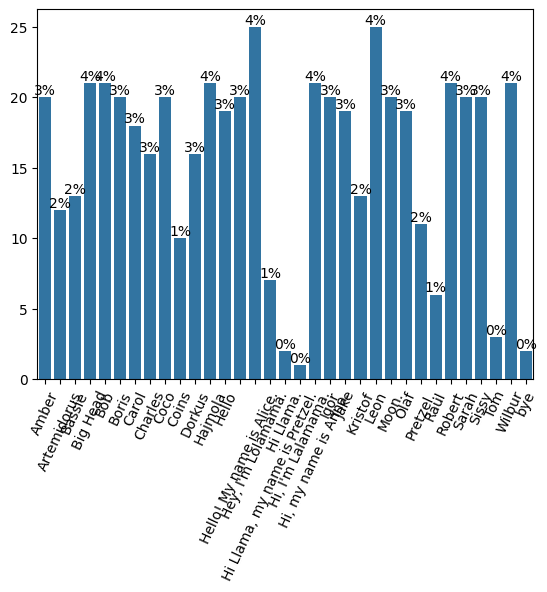

In [16]:
speakers = df['speaker']
print('Speaker values', set(speakers))
print()
counts = Counter(speakers)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

Emotion values {'fear', 'anger', 'disgust', 'surprise', 'joy', 'neutral', 'sadness'}

OrderedDict([('anger', 138), ('disgust', 32), ('fear', 64), ('joy', 110), ('neutral', 129), ('sadness', 33), ('surprise', 17)])
Total of values 523


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_64629/2446219359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


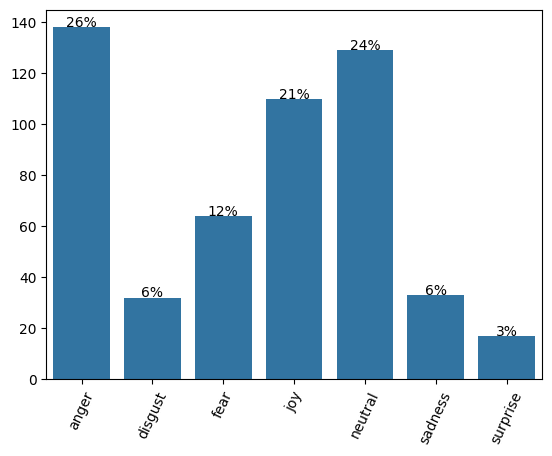

In [8]:
talks = {}
emotions = []
for ind in df.index:
    votes = df['Votes'][ind]
    counts = Counter(votes)
    counts_sorted = OrderedDict(sorted(counts.items()))
    #print(counts_sorted)
    emotion = next(iter(counts_sorted))
    annotator = df['Annotator'][ind]
    speaker = df['speaker'][ind]
    if not annotator=='auto' and not str(emotion)=='nan':
        emotions.append(emotion)
    if speaker in talks:
        talks[speaker].append(str(annotator)+"-"+str(emotion))
    else:
        talks[speaker]=[str(annotator)+"-"+str(emotion)]

print('Emotion values', set(emotions))
print()
counts = Counter(emotions)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

## Adjudication

Emotion values {'fear', 'anger', 'disgust', 'surprise', 'joy', 'neutral', 'sadness'}

OrderedDict([('anger', 94), ('disgust', 22), ('fear', 53), ('joy', 79), ('neutral', 189), ('sadness', 57), ('surprise', 29)])
Total of values 523


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_64629/2446219359.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


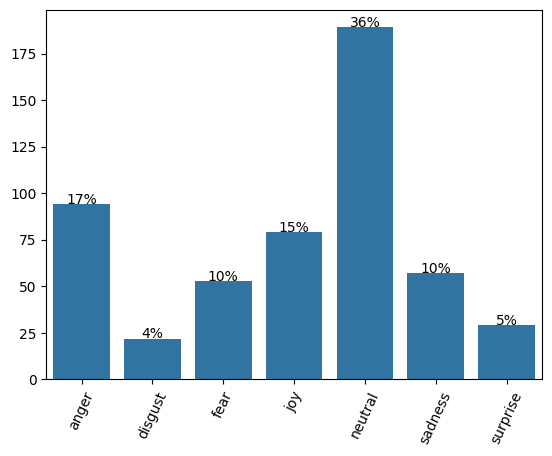

In [12]:
talks = {}
emotions = []
for ind in df.index:
    votes = df['Votes'][ind]
    counts = Counter(votes)
    emotion = ""
    count = 0
    for e in counts:
        if counts[e]>count:
            emotion = e
            count = counts[e]
    #print(emotion, counts)
    annotator = df['Annotator'][ind]
    speaker = df['speaker'][ind]
    if not annotator=='auto' and not str(emotion)=='nan':
        emotions.append(emotion)
    if speaker in talks:
        talks[speaker].append(str(annotator)+"-"+str(emotion))
    else:
        talks[speaker]=[str(annotator)+"-"+str(emotion)]
df['Adjudication']=emotions
adjudicated_file = "adjudicated_annotations.json"
df.to_json(adjudicated_file, orient="records", indent = 4)
    
print('Emotion values', set(emotions))
print()
counts = Counter(emotions)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

## End of notebook